In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
def create_scatterplot(df, column):
    f, axe = plt.subplots(figsize=(7,3))
    sns.scatterplot(x=df[column], y=df['default'], data=df)
    axe.set(xlabel = column, ylabel = 'Default')

In [7]:
df = pd.read_csv("bankloans.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [8]:
df.shape

(850, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [10]:
df.nunique()

age          37
ed            5
employ       33
address      32
income      129
debtinc     245
creddebt    842
othdebt     848
default       2
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
print("Percentage of Missing values\n")
for column in df.columns:
    print("{}: {}%".format(column, np.round(df[column].isnull().sum()/len(df[column])*100,2)))

Percentage of Missing values

age: 0.0%
ed: 0.0%
employ: 0.0%
address: 0.0%
income: 0.0%
debtinc: 0.0%
creddebt: 0.0%
othdebt: 0.0%
default: 17.65%


In [13]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [14]:
df['default'].isna().sum()

150

We can drop rows where default is null for now

In [15]:
df = df.dropna()
df.shape

(700, 9)

<Axes: xlabel='default', ylabel='count'>

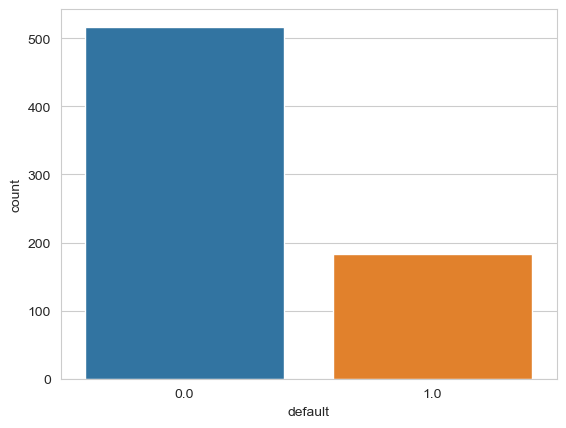

In [16]:
sns.set_style('whitegrid')
sns.countplot(x=df['default'], data=df)

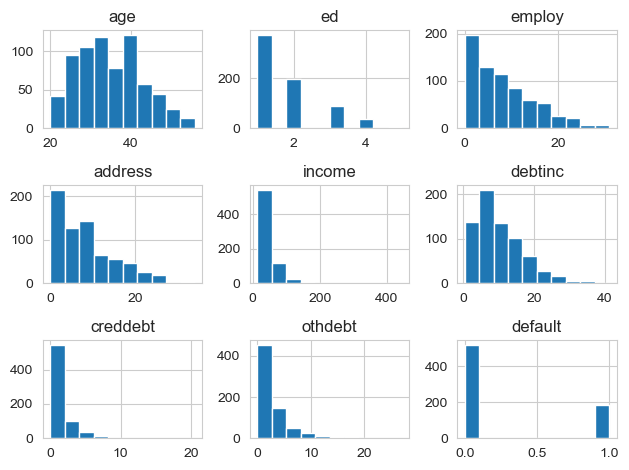

In [17]:
df.hist()
plt.tight_layout()

<Axes: >

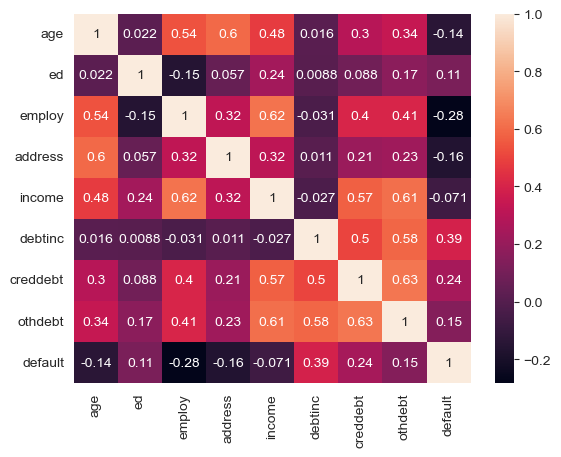

In [18]:
corr = df.corr()
sns.heatmap(corr, annot=True)

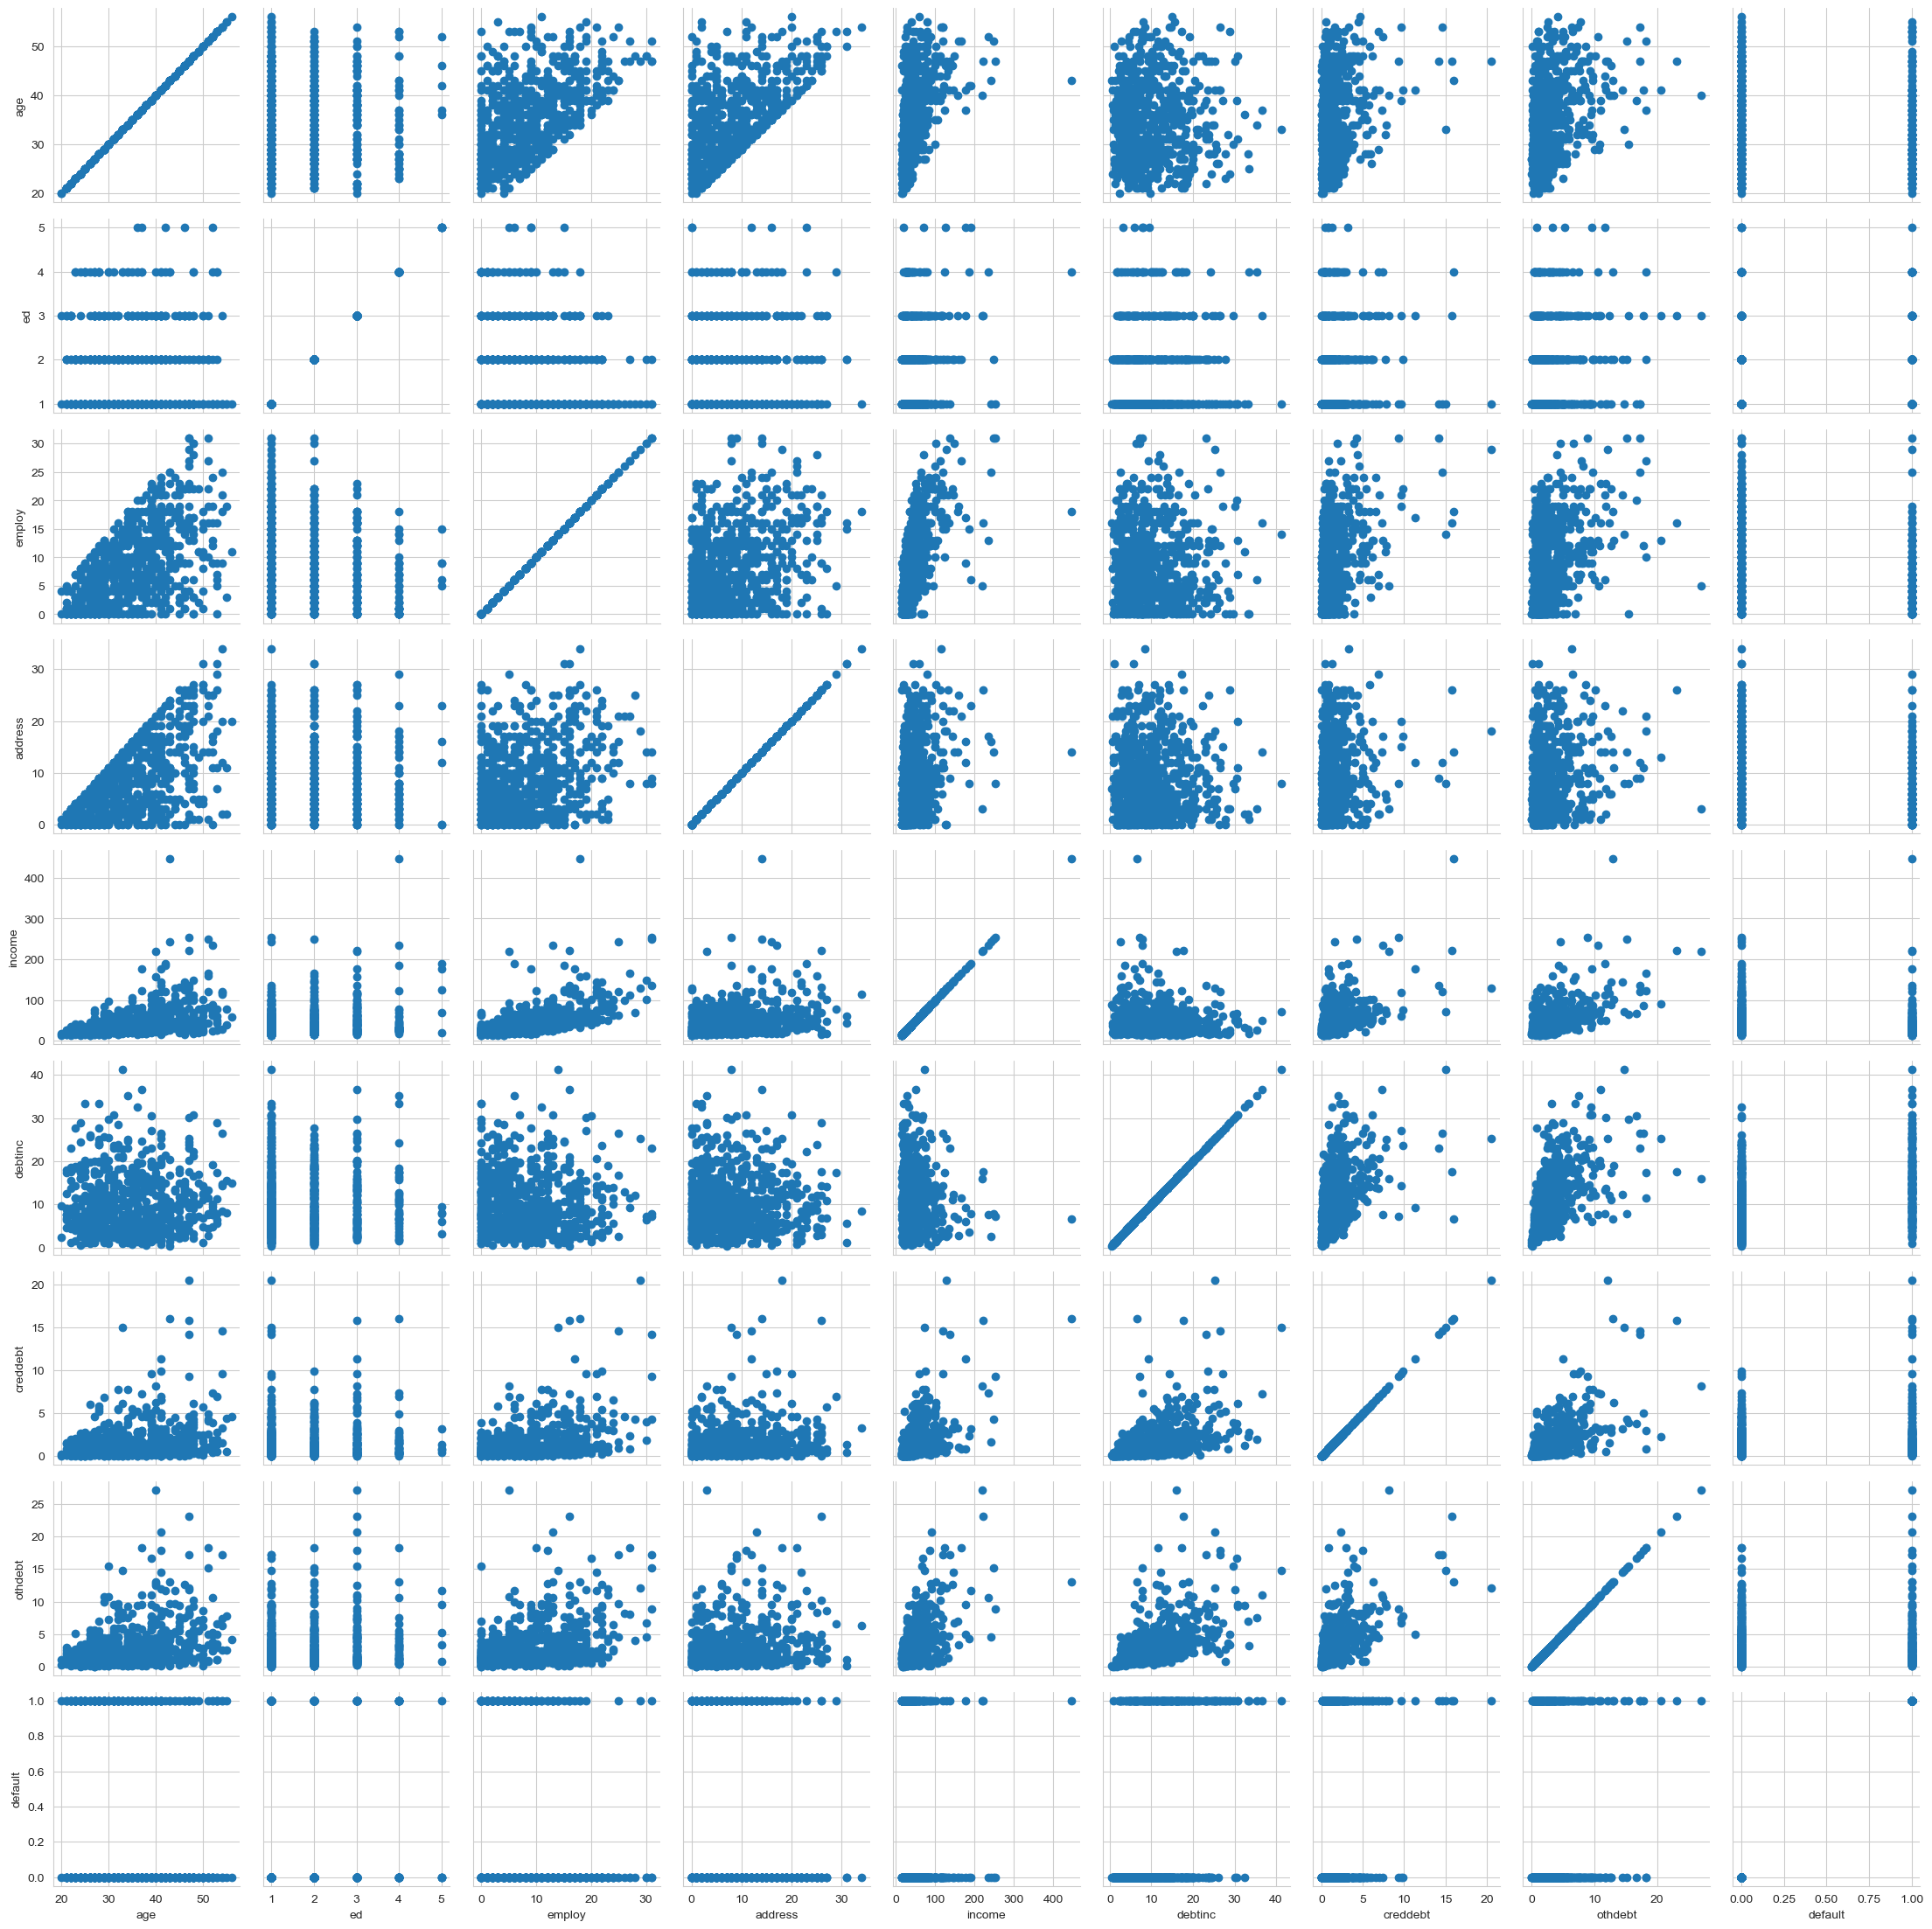

In [19]:
g = sns.PairGrid(df)
g.map(plt.scatter)

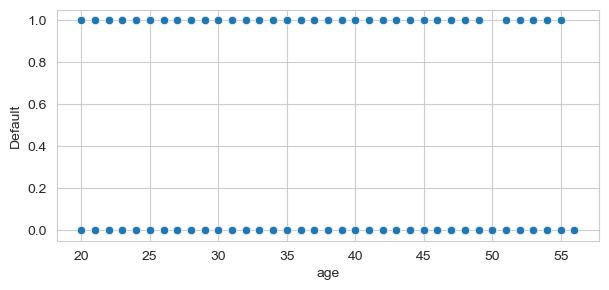

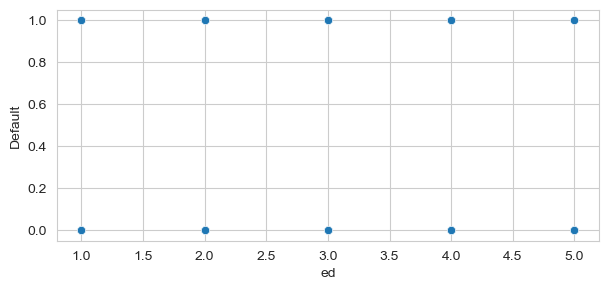

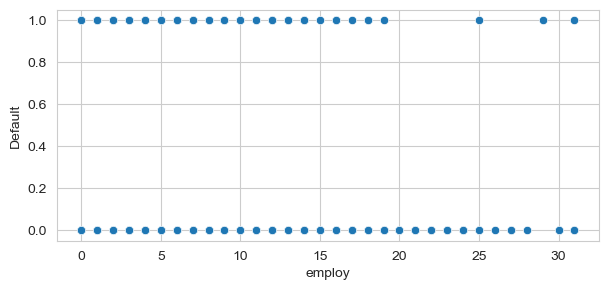

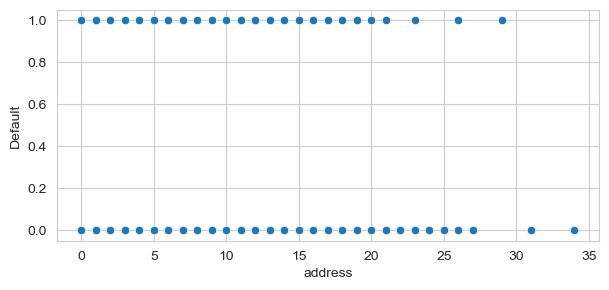

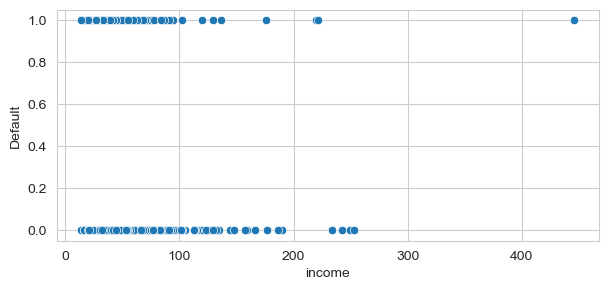

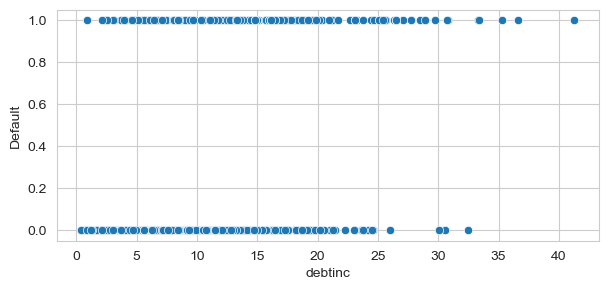

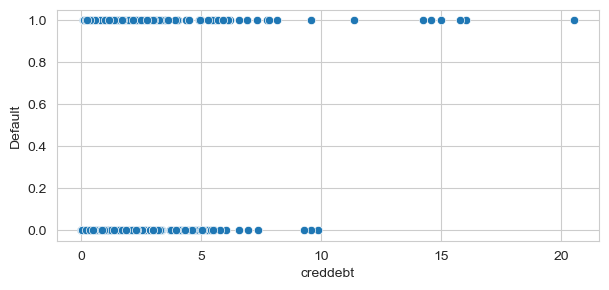

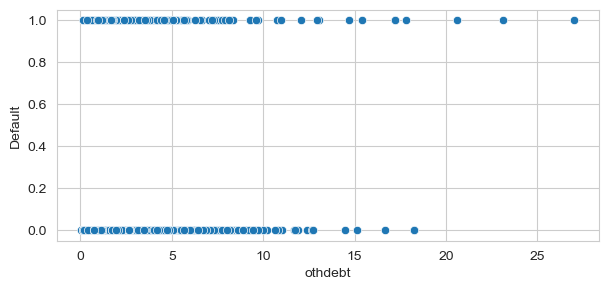

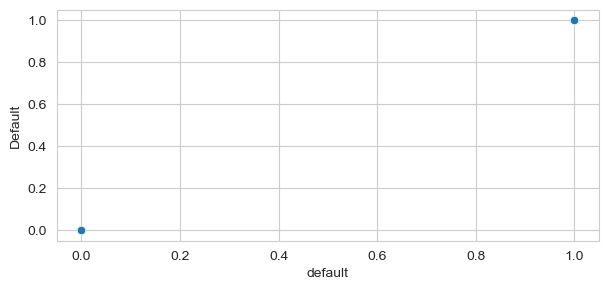

In [20]:
for column in df.columns:
    create_scatterplot(df, column)

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y = df['default']
x = df.drop('default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
log = LogisticRegression()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()

In [23]:
log_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('log', log)
])

In [24]:
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Clasisfication Report:\n", classification_report(y_test, y_pred))

Logistic Regression:

Accuracy Score: 0.8285714285714286
Confusion Matrix:
 [[97  6]
 [18 19]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       103
         1.0       0.76      0.51      0.61        37

    accuracy                           0.83       140
   macro avg       0.80      0.73      0.75       140
weighted avg       0.82      0.83      0.82       140

Random Forest Classifier:

Accuracy Score: 0.8
Confusion Matrix:
 [[96  7]
 [21 16]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       103
         1.0       0.70      0.43      0.53        37

    accuracy                           0.80       140
   macro avg       0.76      0.68      0.70       140
weighted avg       0.79      0.80      0.78       140

KNN Classifier:

Accuracy Score: 0.7714285714285715
Confusion Matrix:
 [[95  8]
 [24 13]]
Clasisfication Report:
     

In [25]:
fold = KFold(n_splits = 5, random_state=1, shuffle = True)
print("Model Evaluation Scores:\n\n")
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    scores = cross_val_score(model,
                                X_train,
                                y_train,
                                cv = fold,
                                scoring = 'accuracy')
    print(model_name+":")
    print("Accuracy: ",np.mean(scores))
    print("\n")

Model Evaluation Scores:


Logistic Regression:
Accuracy:  0.7910714285714284


Random Forest Classifier:
Accuracy:  0.7803571428571429


KNN Classifier:
Accuracy:  0.7625


SV Classifier:
Accuracy:  0.7428571428571429




In [26]:
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Clasisfication Report:\n", classification_report(y_test, y_pred))

Logistic Regression:

Accuracy Score: 0.8285714285714286
Confusion Matrix:
 [[97  6]
 [18 19]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       103
         1.0       0.76      0.51      0.61        37

    accuracy                           0.83       140
   macro avg       0.80      0.73      0.75       140
weighted avg       0.82      0.83      0.82       140

Random Forest Classifier:

Accuracy Score: 0.8214285714285714
Confusion Matrix:
 [[96  7]
 [18 19]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       103
         1.0       0.73      0.51      0.60        37

    accuracy                           0.82       140
   macro avg       0.79      0.72      0.74       140
weighted avg       0.81      0.82      0.81       140

KNN Classifier:

Accuracy Score: 0.7714285714285715
Confusion Matrix:
 [[95  8]
 [24 13]]
Clasisficatio

In [27]:
under = RandomUnderSampler(random_state=1)
X_under, y_under = under.fit_resample(X_train, y_train)
y_under.value_counts()

0.0    146
1.0    146
Name: default, dtype: int64

In [28]:
print("Model Evaluation Scores:\n\n")
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    scores = cross_val_score(model,
                                X_under,
                                y_under,
                                cv = fold,
                                scoring = 'accuracy')
    print(model_name+":")
    print("Accuracy: ",np.mean(scores))
    print("\n")

Model Evaluation Scores:


Logistic Regression:
Accuracy:  0.7468147282291058


Random Forest Classifier:
Accuracy:  0.7328462887200468


KNN Classifier:
Accuracy:  0.6507305669199299


SV Classifier:
Accuracy:  0.6811805961426067




In [29]:
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_under, y_under)
    y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Clasisfication Report:\n", classification_report(y_test, y_pred))

Logistic Regression:

Accuracy Score: 0.7642857142857142
Confusion Matrix:
 [[76 27]
 [ 6 31]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       103
         1.0       0.53      0.84      0.65        37

    accuracy                           0.76       140
   macro avg       0.73      0.79      0.74       140
weighted avg       0.82      0.76      0.78       140

Random Forest Classifier:

Accuracy Score: 0.75
Confusion Matrix:
 [[73 30]
 [ 5 32]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81       103
         1.0       0.52      0.86      0.65        37

    accuracy                           0.75       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.82      0.75      0.76       140

KNN Classifier:

Accuracy Score: 0.6928571428571428
Confusion Matrix:
 [[71 32]
 [11 26]]
Clasisfication Report:
    

In [30]:
over = RandomOverSampler(random_state = 1)
X_over, y_over = over.fit_resample(X_train, y_train)
y_over.value_counts()

0.0    414
1.0    414
Name: default, dtype: int64

In [31]:
print("Model Evaluation Scores:\n\n")
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    scores = cross_val_score(model,
                                X_under,
                                y_under,
                                cv = fold,
                                scoring = 'accuracy')
    print(model_name+":")
    print("Accuracy: ",np.mean(scores))
    print("\n")

Model Evaluation Scores:


Logistic Regression:
Accuracy:  0.7468147282291058


Random Forest Classifier:
Accuracy:  0.7191700759789598


KNN Classifier:
Accuracy:  0.6507305669199299


SV Classifier:
Accuracy:  0.6811805961426067




In [32]:
for model, model_name in zip([log_pipe,forest,knn,svm],['Logistic Regression','Random Forest Classifier','KNN Classifier','SV Classifier']):
    model.fit(X_under, y_under)
    y_pred = model.predict(X_test)
    print(model_name+":\n")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Clasisfication Report:\n", classification_report(y_test, y_pred))

Logistic Regression:

Accuracy Score: 0.7642857142857142
Confusion Matrix:
 [[76 27]
 [ 6 31]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       103
         1.0       0.53      0.84      0.65        37

    accuracy                           0.76       140
   macro avg       0.73      0.79      0.74       140
weighted avg       0.82      0.76      0.78       140

Random Forest Classifier:

Accuracy Score: 0.7785714285714286
Confusion Matrix:
 [[78 25]
 [ 6 31]]
Clasisfication Report:
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.83       103
         1.0       0.55      0.84      0.67        37

    accuracy                           0.78       140
   macro avg       0.74      0.80      0.75       140
weighted avg       0.83      0.78      0.79       140

KNN Classifier:

Accuracy Score: 0.6928571428571428
Confusion Matrix:
 [[71 32]
 [11 26]]
Clasisficatio